# **This work is Practice for the ICT Neuroscience course based on Izhikevich model.**

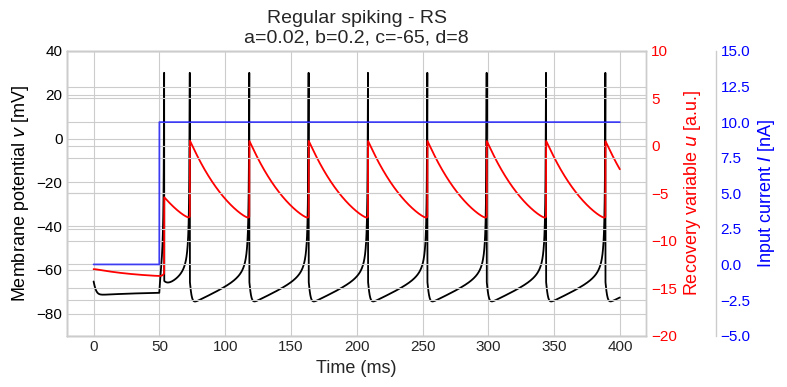

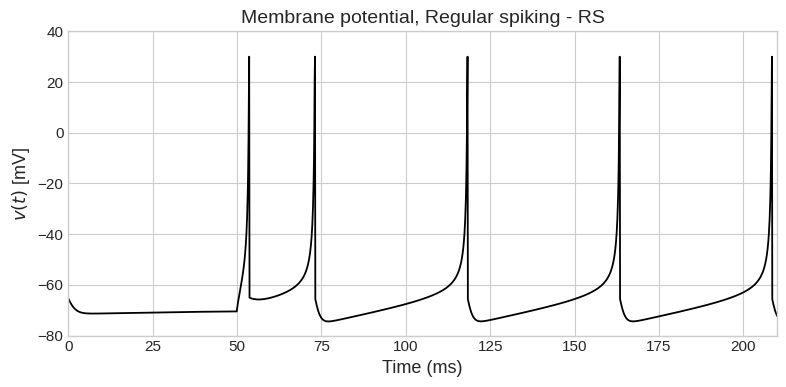

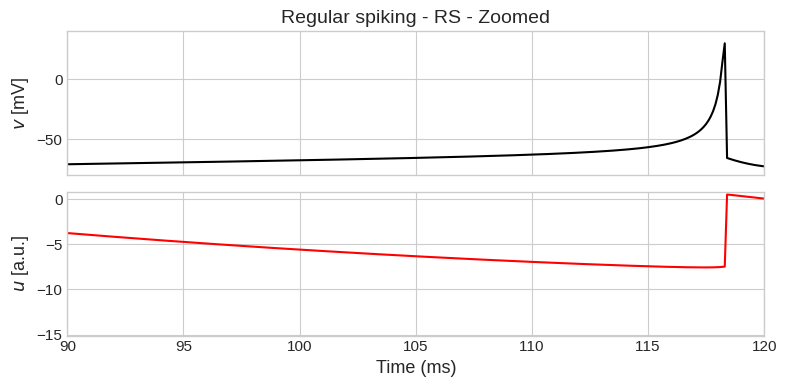

/tmp/ipython-input-15-104904995.py:117: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  fig.tight_layout()


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import os

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({'font.size': 11})
os.makedirs('figures', exist_ok=True)

# Params
T, dt = 400, 0.1
steps = int(T / dt)
t_values = np.arange(0, T, dt)
t_start, t_end = 50, T

# neuron type
p_RS = [0.02, 0.2, -65, 8, "Regular spiking - RS"]
a, b, c, d, neuron_type = p_RS
v, u = -65, b * -65
I_baseline = 10
v_values = np.zeros(steps)
u_values = np.zeros(steps)
I_values = np.zeros(steps)

#simulat
for t in range(steps):
    t_ms = t * dt
    I = I_baseline if t_start <= t_ms <= t_end else 0
    if v >= 30:
        v, u = c, u + d
    v += dt * 0.5 * (0.04 * v**2 + 5 * v + 140 - u + I)
    v += dt * 0.5 * (0.04 * v**2 + 5 * v + 140 - u + I)
    u += dt * a * (b * v - u)
    v_values[t], u_values[t], I_values[t] = v, u, I

v_values = np.clip(v_values, None, 30)


fig, ax1 = plt.subplots(figsize=(8, 4))
ax1.plot(t_values, v_values, 'k', lw=1.3, label='$v(t)$')
ax1.set_ylabel('Membrane potential $v$ [mV]', color='black')
ax1.set_xlabel('Time (ms)')
ax1.set_ylim(-90, 40)
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(t_values, u_values, 'r', lw=1.3, label='$u(t)$')
ax2.set_ylabel('Recovery variable $u$ [a.u.]', color='red')
ax2.set_ylim(-20, 10)
ax2.tick_params(axis='y', labelcolor='red')

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 50))
ax3.plot(t_values, I_values, 'b', lw=1.3, alpha=0.7, label='$I(t)$')
ax3.set_ylabel('Input current $I$ [nA]', color='blue')
ax3.set_ylim(-5, 15)
ax3.tick_params(axis='y', labelcolor='blue')

plt.title(f'{neuron_type}\na={a}, b={b}, c={c}, d={d}')
fig.tight_layout()
plt.show()


plt.figure(figsize=(8, 4))
plt.plot(t_values, v_values, 'k', lw=1.3)
plt.title(f'Membrane potential, {neuron_type}')
plt.xlabel('Time (ms)')
plt.ylabel('$v(t)$ [mV]')
plt.xlim(0, 210)
plt.ylim(-80, 40)
plt.grid(True)
plt.tight_layout()
plt.show()


fig, axs = plt.subplots(2, 1, figsize=(8, 4), sharex=True)
axs[0].plot(t_values, v_values, 'k', lw=1.5)
axs[0].set_ylabel('$v$ [mV]')
axs[0].set_xlim(90, 120)
axs[0].set_ylim(-80, 40)
axs[0].set_title(f'{neuron_type} - Zoomed')
axs[0].grid(True)

axs[1].plot(t_values, u_values, 'r', lw=1.5)
axs[1].set_ylabel('$u$ [a.u.]')
axs[1].set_xlim(90, 120)
axs[1].set_ylim(np.min(u_values)*1.1, np.max(u_values)+abs(np.max(u_values))*0.5)
axs[1].set_xlabel('Time (ms)')
axs[1].grid(True)

fig.tight_layout()
plt.show()


# Plot a vs b
for x, y, label, color in zip(a_vals, b_vals, labels, colors):
    axs[0].plot(x, y, 'o', color=color)
    axs[0].text(x + 0.002, y, label, fontsize=10, color=color)

axs[0].set_xlabel('Parameter a')
axs[0].set_ylabel('Parameter b')
axs[0].set_title('a vs b')
axs[0].set_xlim(0, 0.12)
axs[0].set_ylim(0.15, 0.3)
axs[0].grid(True)

# Plot c vs d
for x, y, label, color in zip(c_vals, d_vals, labels, colors):
    axs[1].plot(x, y, 'o', color=color)
    axs[1].text(x + 1, y, label, fontsize=10, color=color)

axs[1].set_xlabel('Parameter c')
axs[1].set_ylabel('Parameter d')
axs[1].set_title('c vs d')
axs[1].set_xlim(-70, -45)
axs[1].set_ylim(-1, 10)
axs[1].grid(True)
fig.tight_layout()
plt.show()


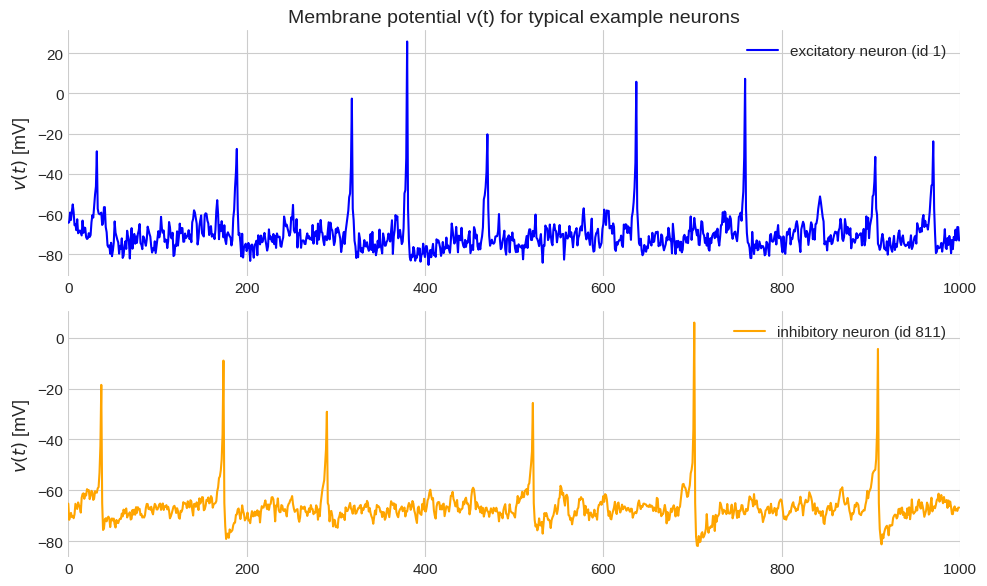

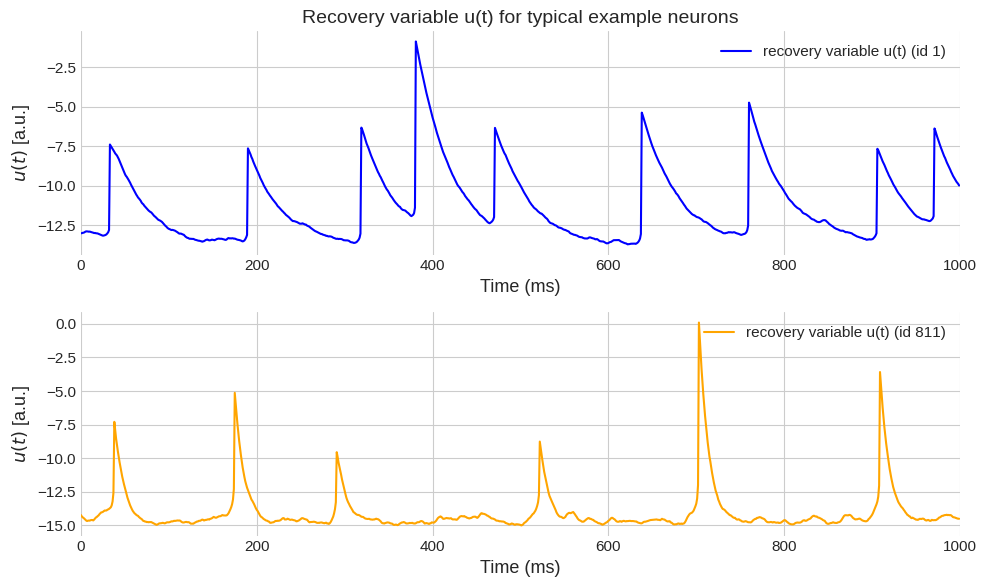

In [16]:
"""
Spiking Neural Network model using Izhikevich model.
"""
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 11})
import os
if not os.path.exists('figures'):
    os.makedirs('figures')

np.random.seed(0)
Ne = 800
Ni = 202
T = 1000

re = np.random.rand(Ne, 1)
ri = np.random.rand(Ni, 1)
p_RS  = [0.02, 0.2, -65, 8, "regular spiking (RS)"]
p_IB  = [0.02, 0.2, -55, 4, "intrinsically bursting (IB)"]
p_CH  = [0.02, 0.2, -51, 2, "chattering (CH)"]
p_FS  = [0.1, 0.2, -65, 2, "fast spiking (FS)"]
p_TC  = [0.02, 0.25, -65, 0.05, "thalamic-cortical (TC)"]
p_LTS = [0.02, 0.25, -65, 2, "low-threshold spiking (LTS)"]
p_RZ  = [0.1, 0.26, -65, 2, "resonator (RZ)"]
a_e, b_e, c_e, d_e, name_e = p_RS
a_i, b_i, c_i, d_i, name_i = p_LTS
a = np.vstack((a_e * np.ones((Ne, 1)), a_i + 0.08 * ri))
b = np.vstack((b_e * np.ones((Ne, 1)), b_i - 0.05 * ri))
c = np.vstack((c_e + 15 * re**2,       c_i * np.ones((Ni, 1))))
d = np.vstack((d_e-6 * re**2,          d_i * np.ones((Ni, 1))))
S = np.hstack((0.5 * np.random.rand(Ne+Ni, Ne), -1*np.random.rand(Ne+Ni, Ni)))



v = -65 * np.ones((Ne+Ni, 1))
u = b * v
firings = np.array([]).reshape(0, 2)

# initialization
I_array = np.zeros((Ne+Ni, T))
v_array = np.zeros((Ne+Ni, T))
u_array = np.zeros((Ne+Ni, T))


for t in range(0, T):
    I = np.vstack((5 * np.random.randn(Ne, 1), 2 * np.random.randn(Ni, 1)))
    if t > 0:
        I += np.sum(S[:, fired], axis=1).reshape(-1, 1)

    v += 0.5 * (0.04 * v**2 + 5 * v + 140 - u + I)
    v += 0.5 * (0.04 * v**2 + 5 * v + 140 - u + I)
    u +=  a * (b * v - u)

    fired = np.where(v >= 30)[0]
    if fired.size > 0:
        firings = np.vstack((firings, np.hstack((t * np.ones((fired.size, 1)), fired.reshape(-1, 1)))))

    v[fired] = c[fired] # resetting
    u[fired] = u[fired] + d[fired]

    """ # clip v to +30 mV if it exceeds this value:
    v = np.clip(v, -100, 30) """

    I_array[:, t] = I.flatten()
    v_array[:, t] = v.flatten()
    u_array[:, t] = u.flatten()

a_str = f"{a[0, 0].round(2)}_{a[-1:, 0][0].round(2)}"
b_str = f"{b[0, 0].round(2)}_{b[-1:, 0][0].round(2)}"
c_str = f"{c[0, 0].round(2)}_{c[-1:, 0][0].round(2)}"
d_str = f"{d[0, 0].round(2)}_{d[-1:, 0][0].round(2)}"

neuron_e_id = 1
neuron_i_id = 811
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(v_array[neuron_e_id, :], label=f'excitatory neuron (id {neuron_e_id})', color='blue')
plt.title(f'Membrane potential v(t) for typical example neurons')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.xlim([0, T])
plt.ylabel('$v(t)$ [mV]')
plt.legend(loc='upper right')

plt.subplot(2, 1, 2)
plt.plot(v_array[neuron_i_id, :], label=f'inhibitory neuron (id {neuron_i_id})', color='orange')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.xlim([0, T])
plt.ylabel('$v(t)$ [mV]')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig(f'figures/izhikevich_SNN_v_Ne_{name_e}_Ni_{name_i}.png', dpi=120)
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(u_array[neuron_e_id, :], label=f'recovery variable u(t) (id {neuron_e_id})', color='blue')
plt.title(f'Recovery variable u(t) for typical example neurons')
plt.xlabel('Time (ms)')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.xlim([0, T])
plt.ylabel('$u(t)$ [a.u.]')
plt.legend(loc='upper right')

plt.subplot(2, 1, 2)
plt.plot(u_array[neuron_i_id, :], label=f'recovery variable u(t) (id {neuron_i_id})', color='orange')
plt.xlabel('Time (ms)')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.xlim([0, T])
plt.ylabel('$u(t)$ [a.u.]')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig(f'figures/izhikevich_SNN_u_Ne_{name_e}_Ni_{name_i}.png', dpi=120)
plt.show()
